<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data_finalquery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Updated** 26/02/2024

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import math
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


In [6]:
!ls /content/drive/MyDrive/KKNV

 11a5490b-0e2d-4fd7-b54e-e2ebd0a72df6.zip  'Pilot reading task.gsheet'
 behaviorals				    protocols
 comorbidity				    Query1.csv
 data26.02.2024.csv			   'Query 1.Dot values.csv'
 iq_overview.csv			    Query2.csv
 iq_overview.gsheet			   'Query 2.Dot values.csv'
 old					    Query_final.csv
 Pheno.csv				    sites.csv
 pheno_mri.csv				    tasks
 Pilot.csv				    Temporal_Frequency_Staircase_V3_gamified_L2R_Ilia.eve


## Pipeline to make the data convinient to use

Here we are going to work on the database from the 2nd query where all of the visits are combined within their original identifier.

In [7]:
# our dataset
data = pd.read_csv(
    working_path.joinpath('data26.02.2024.csv'),
    index_col=None,
    low_memory=False
)

In [8]:
data.shape

(6689, 572)

In [9]:
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

6689
6689


In [10]:
data = data.drop(labels=0, axis=0)

In [11]:
data.head()

,Identifiers,"AUDIT,AUDIT_Total_Score","Audit,AUDIT_Total_Score","Barratt,Barratt_Total","Barratt,Barratt_Total_Edu","Barratt,Barratt_Total_Occ","Basic_Demos,Age","Basic_Demos,EID","Basic_Demos,Patient_ID","Basic_Demos,Sex",...,"WISC_Remote,WISC_VCI_Percentile","WISC_Remote,WISC_VCI_Sum","WISC_Remote,WISC_VP_Raw","WISC_Remote,WISC_VP_Scaled","WISC_Remote,WISC_Vocab_Raw","WISC_Remote,WISC_Vocab_Scaled","WISC_Remote,WISC_WMI","WISC_Remote,WISC_WMI_Percentile","WISC_Remote,WISC_WMI_Sum","WISC_Remote,WISC_complete"
1,NDARAA075AMK,.,.,58.5,21,37.5,6.72804,NDARAA075AMK,NDARAA075AMK,1,...,.,.,.,.,.,.,.,.,.,.
2,NDARAA112DMH,.,.,37.5,15,22.5,5.545744,NDARAA112DMH,NDARAA112DMH,0,...,.,.,.,.,.,.,.,.,.,.
3,NDARAA117NEJ,.,.,12.5,7.5,5,7.475929,NDARAA117NEJ,NDARAA117NEJ,0,...,.,.,.,.,.,.,.,.,.,.
4,NDARAA306NT2,0,0,33,18,15,21.216746,NDARAA306NT2,NDARAA306NT2,1,...,.,.,.,.,.,.,.,.,.,.
5,NDARAA358BPN,.,.,.,.,.,11.853296,NDARAA358BPN,NDARAA358BPN,0,...,.,.,.,.,.,.,.,.,.,.


In [12]:
versions = []
for i in data.Identifiers.values.tolist():
  if '_' in i:
    versions.append(i)
print(len(versions))

1819


In [13]:
columns = data.columns
i = 0
for id in versions:
  values = data[data['Identifiers'] == id].values.tolist()
  while len(values) == 1:
    values = values[0]
  for value in values[1:]:
    if value != '.':
      if type(value) == str:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      elif type(value) != str and math.isnan(value) is not True:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      else:
        if math.isnan(value) is not True:
          print(value, type(value))
  i += 1
print(i)

1819


In [14]:
for id in versions:
  data = data[data['Identifiers'] != id]
data.shape

(4869, 572)

In [15]:
data.columns

Index(['Identifiers', 'AUDIT,AUDIT_Total_Score', 'Audit,AUDIT_Total_Score',
       'Barratt,Barratt_Total', 'Barratt,Barratt_Total_Edu',
       'Barratt,Barratt_Total_Occ', 'Basic_Demos,Age', 'Basic_Demos,EID',
       'Basic_Demos,Patient_ID', 'Basic_Demos,Sex',
       ...
       'WISC_Remote,WISC_VCI_Percentile', 'WISC_Remote,WISC_VCI_Sum',
       'WISC_Remote,WISC_VP_Raw', 'WISC_Remote,WISC_VP_Scaled',
       'WISC_Remote,WISC_Vocab_Raw', 'WISC_Remote,WISC_Vocab_Scaled',
       'WISC_Remote,WISC_WMI', 'WISC_Remote,WISC_WMI_Percentile',
       'WISC_Remote,WISC_WMI_Sum', 'WISC_Remote,WISC_complete'],
      dtype='object', length=572)

In [16]:
# weird subject that doesn't have any data in
data = data[data['Identifiers'] != 'NDARXP325YLV']

In [17]:
data.columns[:50]

Index(['Identifiers', 'AUDIT,AUDIT_Total_Score', 'Audit,AUDIT_Total_Score',
       'Barratt,Barratt_Total', 'Barratt,Barratt_Total_Edu',
       'Barratt,Barratt_Total_Occ', 'Basic_Demos,Age', 'Basic_Demos,EID',
       'Basic_Demos,Patient_ID', 'Basic_Demos,Sex', 'Basic_Demos,Site',
       'Basic_Demos,Study_Site', 'CELF,CELF_Complete', 'CELF,CELF_Total',
       'CELF5_Meta,CLEF5M_CS_Rank', 'CELF5_Meta,CLEF5M_CS_Raw',
       'CELF5_Meta,CLEF5M_CS_Scale', 'CELF5_Meta,CLEF5M_FL_Rank',
       'CELF5_Meta,CLEF5M_FL_Raw', 'CELF5_Meta,CLEF5M_FL_Scale',
       'CELF5_Meta,CLEF5M_MI_Rank', 'CELF5_Meta,CLEF5M_MI_Raw',
       'CELF5_Meta,CLEF5M_MI_S', 'CELF5_Meta,CLEF5M_MM_Rank',
       'CELF5_Meta,CLEF5M_MM_Raw', 'CELF5_Meta,CLEF5M_MM_Scale',
       'CELF5_Meta,CLEF5M_MPI_Rank', 'CELF5_Meta,CLEF5M_MPI_Stnd',
       'CELF5_Meta,CLEF5M_MPI_Sum', 'CELF5_Meta,CLEF5M_MSI_Rank',
       'CELF5_Meta,CLEF5M_MSI_Stnd', 'CELF5_Meta,CLEF5M_MSI_Sum',
       'CELF5_Meta,CLEF5M_TMI_Rank', 'CELF5_Meta,CLEF5M_TM

In [18]:
data = data.rename(columns={'Basic_Demos,Study_Site':'Site'})

Let's now work on individual columns to make them more convinient for screening

In [19]:
# work on Age column
data['Basic_Demos,Age'] = data['Basic_Demos,Age'].astype(float)

In [20]:
# work on Sex column
data['Basic_Demos,Sex'] = data['Basic_Demos,Sex'].astype(int)

In [21]:
# work on Site column
data['Site'] = data['Site'].astype(int)
data.drop(['Basic_Demos,Site'], axis=1, inplace=True)

In [22]:
data['Diagnosis_ClinicianConsensus,DX_01'] = data['Diagnosis_ClinicianConsensus,DX_01'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_02'] = data['Diagnosis_ClinicianConsensus,DX_02'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_03'] = data['Diagnosis_ClinicianConsensus,DX_03'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_04'] = data['Diagnosis_ClinicianConsensus,DX_04'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_05'] = data['Diagnosis_ClinicianConsensus,DX_05'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_06'] = data['Diagnosis_ClinicianConsensus,DX_06'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_07'] = data['Diagnosis_ClinicianConsensus,DX_07'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_08'] = data['Diagnosis_ClinicianConsensus,DX_08'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_09'] = data['Diagnosis_ClinicianConsensus,DX_09'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_10'] = data['Diagnosis_ClinicianConsensus,DX_10'].fillna('.')

In [23]:
# work on Diagnosis column
# looks like a dot could be no diagnosis as it seems to be consistent across the columns
# there are also nan values in confirmed column
# throw away this 'No Diagnosis Given: Incomplete Eval'
# give 0 to these 'No Diagnosis Given'
def diagnosis(df, number):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Confirmed'
  diagnosis = df[name_diag].values
  confirmed = df[name_conf].values

  dyslexia = []
  new_diagnosis = []
  for i in range(0, df.shape[0]):
    # if it's '.', ' ' value or incomplete eval
    if diagnosis[i] == '.' or diagnosis[i] == ' ':
      dyslexia.append('.')
      new_diagnosis.append('.')
    elif  'Incomplete' in diagnosis[i]:
      dyslexia.append('Incomplete')
      new_diagnosis.append('Incomplete')
    # if it is no diagnisis given
    elif diagnosis[i] == 'No Diagnosis Given':
      dyslexia.append('Control')
      new_diagnosis.append('Control')
    # if it's SLD
    elif 'Specific Learning Disorder with' in diagnosis[i]:
      if confirmed[i] != '0':
        dyslexia.append('dys')
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)
    # if some other diagnosis
    else:
      if confirmed[i] != '0':
        dyslexia.append(0)
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)

  return dyslexia, new_diagnosis

In [24]:
# for all data
all_diagnosis = {}
all_dys = {}
for i in range(1, 10):
  dyslexia, new_diagnosis = diagnosis(data, i)
  all_dys['diag_%s' % i] = dyslexia
  all_diagnosis['diag_%s' % i] = new_diagnosis

dys_status = []
for i in range(0, data.shape[0]):
  participant = []
  for sublist in all_dys:
    subset = all_dys[sublist][i]
    participant.append(subset)

  if 'Incomplete' in participant:
    dys_status.append('Incomplete')
  elif 'Control' in participant:
    dys_status.append(0)
  elif 'dys' in participant:
    dys_status.append(1)
  else:
    dys_status.append(0)

all_status = []
for i in range(0, data.shape[0]):
  participant = []
  add = []
  for sublist in all_diagnosis:
    subset = all_diagnosis[sublist][i]
    participant.append(subset)

  if 'Incomplete' in participant:
    all_status.append('Incomplete')
  elif 'Control' in participant:
    all_status.append(0)
  else:
    for each in participant:
      if each != '.' and each != 0:
        add.append(each)
    if len(add) == 0:
      if (i == '.' for i in participant):
        all_status.append('.')
      else:
        print(participant)
        print(add)
        break
    elif len(add) == 1:
      all_status.append(add[0])
    else:
      all_status.append(add)

In [25]:
data['DD'] = dys_status
data['Diagnosis'] = all_status

In [26]:
for i in range(1,10):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(i)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Confirmed'
  name_code = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Code'
  data.drop([name_diag], axis=1, inplace=True)
  data.drop([name_conf], axis=1, inplace=True)
  data.drop([name_code], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10'], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10_Code'], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10_Confirmed'], axis=1, inplace=True)

In [27]:
print('Control subjects')
print(data[(data['DD'] == 0) & (data['Diagnosis'] == 0)].shape[0])
print('Disorders w/out DD')
print(data[(data['DD'] == 0) & (data['Diagnosis'] != 0)].shape[0])
print('Disorders w DD')
print(data[data['DD'] == 1].shape[0])

Control subjects
373
Disorders w/out DD
3320
Disorders w DD
649


In [28]:
new_diag = []
new_dtypes = []
diag = data.Diagnosis.values
for i in diag:
  if i == 0:
    new_diag.append(i)
    new_dtypes.append(i)
  # one diagnosis
  elif type(i) == str:
    if 'Specific Learning Disorder with Impairment' in i:
      new_diag.append('SLD')
      if 'Reading' in i:
        new_dtypes.append('Reading')
      elif 'Written' in i:
        new_dtypes.append('Writing')
      elif 'Mathematics' in i:
        new_dtypes.append('Math')
    else:
      new_diag.append(i)
      new_dtypes.append(0)
  # multiple diagnoses
  elif type(i) == list:
    name_diag = ''
    name_dys = ''
    for element in i:
      if 'Specific Learning Disorder with Impairment' in element:
        name_diag = name_diag + 'SLD' + '. '
        if 'Reading' in element:
          name_dys = name_dys + 'Reading '
        elif 'Written' in element:
          name_dys = name_dys + 'Writing '
        elif 'Mathematics' in element:
          name_dys = name_dys + 'Math '
      elif type(element) is str:
        name_diag = name_diag + element + '.'
      else:
        print(i)
        break
    if name_diag == '':
      print(i)
      break
    new_diag.append(name_diag)

    if name_dys == '':
      new_dtypes.append(0)
    else:
      new_dtypes.append(name_dys)

In [29]:
data['Diagnosis'] = new_diag
data['DD type'] = new_dtypes

In [30]:
def meds(df, number):
  medname = 'DailyMeds,med_name_0' + str(number)
  meds = df[medname].values
  new_meds = []

  for i in range(0, df.shape[0]):
    if meds[i] == '.':
      new_meds.append(0)
    elif type(meds[i]) == float:
      new_meds.append(0)
    elif type(meds[i]) == str:
      new_meds.append(meds[i])
    else:
      print(meds[i], i)
      break
  return new_meds

In [31]:
all_meds = {}
for i in range(1, 4):
  all_meds['med_%s' % i] = meds(data, i)

In [32]:
meds_in_one = []
for i in range(0, data.shape[0]):
  participant = []
  for sublist in all_meds:
    subset = all_meds[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    meds_in_one.append(0)
  elif len(participant) == 1:
    meds_in_one.append(participant[0])
  else:
    name = ''
    for part in participant:
      name = name + part + ' '
    meds_in_one.append(name)

In [33]:
data['Medicine'] = meds_in_one

Working with the DD type columns

In [34]:
dd = data['DD type'].values
new_dd = []
for i in dd:
  if i == 'Reading ' or i == 'Reading Reading ':
    new_dd.append('Reading')
  elif i == 'Reading Writing Math ' or i == 'Reading Math Writing ':
    new_dd.append('Reading, Writing, Math')
  elif i == 'Reading Math ' or i == 'Reading Math Math ' or i == 'Math Reading Reading ' or i == 'Math Reading ':
    new_dd.append('Reading, Math')
  elif i == 'Math ':
    new_dd.append('Math')
  elif i == 'Writing ':
    new_dd.append('Writing')
  elif i == 'Reading Writing ':
    new_dd.append('Reading, Writing')
  elif i == 'Math Writing ' or i == 'Writing Math ':
    new_dd.append('Writing, Math')
  else:
    new_dd.append(i)

In [35]:
data['DD type'] = new_dd

In [36]:
# adding the status of patients to exclude the cases with the diagnosis but w/out DD
status = []
dd = data['DD'].values
diag = data['Diagnosis'].values
for i in range(0, data.shape[0]):
  if dd[i] == 1:
    if diag[i] == 'SLD':
      status.append('only DD')
    elif 'Autism' in diag[i] or 'Intellectual' in diag[i]:
      status.append('DD with autism or intellectual')
    else:
      status.append('DD with comorbidities')
  else:
    if diag[i] == 0:
      status.append('control')
    else:
      status.append('without DD')

In [37]:
data['Status'] = status

In [38]:
# dealing with CTOPP results
names = ['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P', 'CTOPP,CTOPP_BW_R',
       'CTOPP,CTOPP_BW_S', 'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P',
       'CTOPP,CTOPP_EL_R', 'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D',
       'CTOPP,CTOPP_NR_P', 'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S',
       'CTOPP,CTOPP_RD_D', 'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R',
       'CTOPP,CTOPP_RD_S', 'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P',
       'CTOPP,CTOPP_RL_R', 'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D',
       'CTOPP,CTOPP_RO_P', 'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S',
       'CTOPP,CTOPP_RSN_Comp', 'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P',
       'CTOPP,CTOPP_RSN_Sum']

# data full
for i in names:
  data[i] = data[i].fillna('.')

In [39]:
ctopp = []
ids = data.Identifiers.values.tolist()
for id in ids:
  subset = data[data['Identifiers'] == id]
  tests = []
  for name in names:
    if subset[name].values[0] == '.':
      tests.append(name)
  new_tests = ''
  if len(tests) == 0:
    ctopp.append('full')
  elif len(tests) == 28:
    ctopp.append('missing')
  else:
    for test in tests:
      new_tests = new_tests + ', ' + test.replace('CTOPP,CTOPP_', '')
    ctopp.append(new_tests[2:])
data['CTOPP'] = ctopp

In [40]:
diag = data.Diagnosis.values
adhd = []
for i in diag:
  if i == 0:
    adhd.append(0)
  elif 'ADHD' in i:
    if 'ADHD-Inattentive Type' in i:
      adhd.append('ADHD-Inattentive Type')
    elif 'ADHD-Combined Type' in i:
      adhd.append('ADHD-Combined Type')
    elif 'ADHD-Hyperactive/Impulsive Type' in i:
      adhd.append('ADHD-Hyperactive/Impulsive Type')
    elif 'Unspecified Attention-Deficit/Hyperactivity Disorder' in i:
      adhd.append('Unspecified ADHD')
    elif 'Other Specified Attention-Deficit/Hyperactivity Disorder' in i:
      adhd.append('Specified ADHD')
  else:
    adhd.append(0)

In [41]:
data['ADHD'] = adhd

## Exclusion

In [42]:
data_filtered = data.copy() # full

In [43]:
# leaving only right-handed
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] != '.']
data_filtered['EHQ,EHQ_Total'] = data_filtered['EHQ,EHQ_Total'].astype(float)
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] >= 40]

In [44]:
# without Math, Writing, Math+Writing in DD diagnosis
data_filtered = data_filtered[data_filtered['DD type'] != 'Math']
data_filtered = data_filtered[data_filtered['DD type'] != 'Writing']
data_filtered = data_filtered[data_filtered['DD type'] != 'Writing, Math']

In [45]:
# data full
# excluding people older than 18
data_filtered = data_filtered[data_filtered['Basic_Demos,Age'] <= 18]

In [46]:
# excluding people who have some medicine recorded
data_filtered = data_filtered[data_filtered['Medicine'] == 0]

In [47]:
# excluding those who are not controls or people with dd
data_filtered = data_filtered[data_filtered['Status'] != 'without DD']

In [48]:
# excluding those with autism and intellectual disorder
data_filtered = data_filtered[data_filtered['Status'] != 'DD with autism or intellectual']

In [49]:
# data full
# excluding amphetamines, benzaozepines, tca, thc
data_filtered = data_filtered[data_filtered['DrugScreen,AMP500'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,TCA1000'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,THC50'] != '1']

Checking whether there any other criteria that we should consider for filtering the data.

Documenting what I checked and what looks okay:

1.   Audit - okay, no values greater than 15
2.   Barrat test - impulsiveness
3.   Daily meds - checked
4.   Drug screen - checked
5.   MRI information - there, might be used if necessary
6.   PreInt - background information - 'PreInt_EduHx,reading' - describes exposure to reading



In [ ]:
data_filtered.columns[250:300]

Index(['NIH_final,NIH_Card_Sort_Uncorr_Stnd',
       'NIH_final,NIH_Flanker_Age_Corr_Stnd', 'NIH_final,NIH_Flanker_Raw',
       'NIH_final,NIH_Flanker_Uncorr_Stnd',
       'NIH_final,NIH_List_Sort_Age_Corr_Stnd',
       'NIH_final,NIH_List_Sort_Computed_Score', 'NIH_final,NIH_List_Sort_Raw',
       'NIH_final,NIH_List_Sort_Uncorr_Stnd',
       'NIH_final,NIH_Picture_Seq_Age_Corr_Stnd',
       'NIH_final,NIH_Picture_Seq_Computed_Score',
       'NIH_final,NIH_Picture_Seq_Raw',
       'NIH_final,NIH_Picture_Seq_Uncorr_Stnd',
       'NIH_final,NIH_Picture_Vocab_Age_Corr_Stnd',
       'NIH_final,NIH_Picture_Vocab_Computed_Score',
       'NIH_final,NIH_Picture_Vocab_Raw',
       'NIH_final,NIH_Picture_Vocab_Uncorr_Stnd',
       'NIH_final,NIH_Processing_Age_Corr_Stnd',
       'NIH_final,NIH_Processing_Computed_Score',
       'NIH_final,NIH_Processing_Raw', 'NIH_final,NIH_Processing_Uncorr_Stnd',
       'PPVT,PPVT4_Percentile', 'PPVT,PPVT4_RawScore',
       'PPVT,PPVT4_StandardScore', 'PreInt

In [ ]:
data_filtered['PreInt_FamHx_RDC,fepilep'].unique()

array(['No', '.', nan, 'No response', 'Possible/mild', 'Definite/severe'],
      dtype=object)

In [ ]:
data_filtered[data_filtered['PreInt_FamHx,f_adhd'] == '1']

,Identifiers,"AUDIT,AUDIT_Total_Score","Audit,AUDIT_Total_Score","Barratt,Barratt_Total","Barratt,Barratt_Total_Edu","Barratt,Barratt_Total_Occ","Basic_Demos,Age","Basic_Demos,EID","Basic_Demos,Patient_ID","Basic_Demos,Sex",...,"WISC_Remote,WISC_complete",DD,Diagnosis,DD type,Medicine,Status,CTOPP,ADHD,IQ,Test
2054,NDARKR010EN7,.,.,48,18,30,8.034109,NDARKR010EN7,NDARKR010EN7,0,...,.,0,0,0,0,control,"BW_D, BW_P, BW_R, BW_S, EL_D, EL_P, EL_R, EL_S...",0,115,wisc
2118,NDARLA516PH1,.,.,48,18,30,8.034109,NDARLA516PH1,NDARLA516PH1,0,...,.,0,0,0,0,control,"BW_D, BW_P, BW_R, BW_S, EL_D, EL_P, EL_R, EL_S...",0,110,wisc
4707,NDARCA186WGH,0,0,10.5,10.5,0,15.268195,NDARCA186WGH,NDARCA186WGH,0,...,.,1,Unspecified Attention-Deficit/Hyperactivity Di...,"Reading, Math",0,DD with comorbidities,missing,0,83,wasi
4737,NDARFW130NGG,.,.,44,16.5,27.5,8.316107,NDARFW130NGG,NDARFW130NGG,1,...,.,1,Intermittent Explosive Disorder.Other Specifie...,Reading,0,DD with comorbidities,missing,0,86,wasi
4772,NDARKM551DA4,.,.,27,12,15,9.252338,NDARKM551DA4,NDARKM551DA4,0,...,.,1,ADHD-Inattentive Type.Oppositional Defiant Dis...,Reading,0,DD with comorbidities,missing,ADHD-Inattentive Type,76,wasi
4856,NDARYP516VUU,.,.,64.5,19.5,45,10.758156,NDARYP516VUU,NDARYP516VUU,1,...,.,0,0,0,0,control,missing,0,94,wasi


Standardizing the IQ scores and Excluding people with the IQ scores less than 70. The main test is WISC. All others are additional.

In [ ]:
# data full
# substituting rare nan values with '.' for the standardisation of missing values
data_filtered['KBIT,KBIT_IQ_Comp'] = data_filtered['KBIT,KBIT_IQ_Comp'].fillna('.')
data_filtered['WASI,WASI_FSIQ'] = data_filtered['WASI,WASI_FSIQ'].fillna('.')
data_filtered['WAIS,WAIS_FSIQ_SCALE'] = data_filtered['WAIS,WAIS_FSIQ_SCALE'].fillna('.')
data_filtered['WISC,WISC_FSIQ'] = data_filtered['WISC,WISC_FSIQ'].fillna('.')

In [ ]:
# data full
reference_test = []
iq_value = []
wisc = data_filtered['WISC,WISC_FSIQ'].values
kbit = data_filtered['KBIT,KBIT_IQ_Comp'].values
wasi = data_filtered['WASI,WASI_FSIQ'].values
wais = data_filtered['WAIS,WAIS_FSIQ_SCALE'].values
age = data_filtered['Basic_Demos,Age'].values

for i in range(0, data_filtered.shape[0]):
  # if there are no iq results
  if wisc[i] == '.' and kbit[i] == '.' and wais[i] == '.' and wasi[i] == '.':
    iq_value.append('none')
    reference_test.append('none')
  # if we have wisc
  elif wisc[i] != '.':
    if kbit[i] == '.':
      iq_value.append(int(wisc[i]))
      reference_test.append('wisc')
    # if we also have kbit
    else:
      if age[i] < 6:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
      else:
        iq_value.append(int(wisc[i]))
        reference_test.append('wisc')
  # if we don't have wisc
  else:
    if kbit[i] != '.' and wasi[i] != '.':
      if int(wasi[i]) > 70:
        iq_value.append(int(wasi[i]))
        reference_test.append('wasi')
      else:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
    elif kbit[i] != '.':
      iq_value.append(int(kbit[i]))
      reference_test.append('kbit')
    elif wasi[i] != '.':
      iq_value.append(int(wasi[i]))
      reference_test.append('wasi')
    elif wais[i] != '.':
      iq_value.append(int(wais[i]))
      reference_test.append('wais')

In [ ]:
data_filtered['IQ'] = iq_value
data_filtered['Test'] = reference_test

In [ ]:
data_filtered.columns[500:550]

Index(['WISC,WISC_complete', 'WISC_Remote,WISC_DS_Raw',
       'WISC_Remote,WISC_DS_Scaled', 'WISC_Remote,WISC_FRI',
       'WISC_Remote,WISC_FRI_Percentile', 'WISC_Remote,WISC_FRI_Sum',
       'WISC_Remote,WISC_FW_Raw', 'WISC_Remote,WISC_FW_Scaled',
       'WISC_Remote,WISC_Int_BD_Raw', 'WISC_Remote,WISC_Int_BD_Scaled',
       'WISC_Remote,WISC_LNS_Raw', 'WISC_Remote,WISC_LNS_Scaled',
       'WISC_Remote,WISC_MR_Raw', 'WISC_Remote,WISC_MR_Scaled',
       'WISC_Remote,WISC_NMFSIQ', 'WISC_Remote,WISC_NMFSIQ_Percentile',
       'WISC_Remote,WISC_NMFSIQ_Sum', 'WISC_Remote,WISC_NMVSI',
       'WISC_Remote,WISC_NMVSI_Percentile', 'WISC_Remote,WISC_NMVSI_Sum',
       'WISC_Remote,WISC_NSI', 'WISC_Remote,WISC_NSI_Percentile',
       'WISC_Remote,WISC_NSI_Sum', 'WISC_Remote,WISC_NSL_Raw',
       'WISC_Remote,WISC_NSL_Stnd', 'WISC_Remote,WISC_NSQ_Raw',
       'WISC_Remote,WISC_NSQ_Scaled', 'WISC_Remote,WISC_NSQ_Stnd',
       'WISC_Remote,WISC_Similarities_Raw',
       'WISC_Remote,WISC_Similari

In [ ]:
data_filtered[data_filtered['IQ'] == 'none'][['WISC,WISC_complete', 'WISC_Remote,WISC_DS_Raw',
       'WISC_Remote,WISC_DS_Scaled', 'WISC_Remote,WISC_FRI',
       'WISC_Remote,WISC_FRI_Percentile', 'WISC_Remote,WISC_FRI_Sum',
       'WISC_Remote,WISC_FW_Raw', 'WISC_Remote,WISC_FW_Scaled',
       'WISC_Remote,WISC_Int_BD_Raw', 'WISC_Remote,WISC_Int_BD_Scaled',
       'WISC_Remote,WISC_LNS_Raw', 'WISC_Remote,WISC_LNS_Scaled',
       'WISC_Remote,WISC_MR_Raw', 'WISC_Remote,WISC_MR_Scaled',
       'WISC_Remote,WISC_NMFSIQ', 'WISC_Remote,WISC_NMFSIQ_Percentile',
       'WISC_Remote,WISC_NMFSIQ_Sum', 'WISC_Remote,WISC_NMVSI',
       'WISC_Remote,WISC_NMVSI_Percentile', 'WISC_Remote,WISC_NMVSI_Sum',
       'WISC_Remote,WISC_NSI']]

,"WISC,WISC_complete","WISC_Remote,WISC_DS_Raw","WISC_Remote,WISC_DS_Scaled","WISC_Remote,WISC_FRI","WISC_Remote,WISC_FRI_Percentile","WISC_Remote,WISC_FRI_Sum","WISC_Remote,WISC_FW_Raw","WISC_Remote,WISC_FW_Scaled","WISC_Remote,WISC_Int_BD_Raw","WISC_Remote,WISC_Int_BD_Scaled",...,"WISC_Remote,WISC_LNS_Scaled","WISC_Remote,WISC_MR_Raw","WISC_Remote,WISC_MR_Scaled","WISC_Remote,WISC_NMFSIQ","WISC_Remote,WISC_NMFSIQ_Percentile","WISC_Remote,WISC_NMFSIQ_Sum","WISC_Remote,WISC_NMVSI","WISC_Remote,WISC_NMVSI_Percentile","WISC_Remote,WISC_NMVSI_Sum","WISC_Remote,WISC_NSI"
686,0,24,8,106,66,22,25,10,17,8,...,NaN,23,12,92,30,63,83,13,14,98
1260,0,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
1446,0,25,8,115,84,25,28,13,21,12,...,5,23,12,105,63,73,106,66,22,100
2040,0,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2378,0,20,9,97,42,19,12,7,17,13,...,11,18,12,101,53,70,113,81,24,95
3660,0,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3975,0,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4425,0,27,10,123,94,28,28,14,20,11,...,13,25,14,115,84,83,90,25,17,74
4820,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4838,.,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [ ]:
# deleting people with no iq
data_filtered = data_filtered[data_filtered['IQ'] != 'none']

In [ ]:
# deleting people with iq < 70
data_filtered = data_filtered[data_filtered['IQ'] >= 70]

# Characteristics of the ready dataset

In [ ]:
print('Full dataset')
print('Controls')
print(data_filtered[data_filtered['Status'] == 'control'].shape[0])
print('DD without comorbidities')
print(data_filtered[data_filtered['Status'] == 'only DD'].shape[0])
print('DD with comorbidities')
print(data_filtered[data_filtered['Status'] == 'DD with comorbidities'].shape[0])

Full dataset
Controls
268
DD without comorbidities
65
DD with comorbidities
299


In [50]:
data_filtered[data_filtered['DD'] == 1].groupby(['DD type'])[['Identifiers']].count()

,Identifiers
DD type,
Reading,299
"Reading, Math",46
"Reading, Writing",9
"Reading, Writing, Math",10


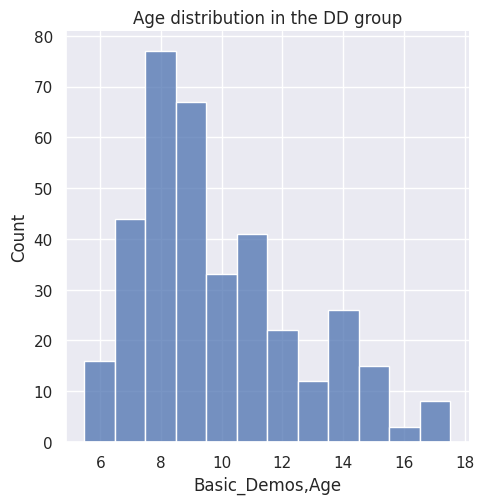

In [ ]:
sns.displot(data_filtered[data_filtered['DD'] == 1]['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in the DD group');

In [71]:
subset = data_filtered[(data_filtered['DD'] == 1) & (data_filtered['CTOPP,CTOPP_RL_R'] != '.') &
                       (data_filtered['Basic_Demos,Sex'] == 1)]
subset['CTOPP,CTOPP_RL_R'] = subset['CTOPP,CTOPP_RL_R'].astype(int)

<ipython-input-71-74d34fbd5163>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['CTOPP,CTOPP_RL_R'] = subset['CTOPP,CTOPP_RL_R'].astype(int)


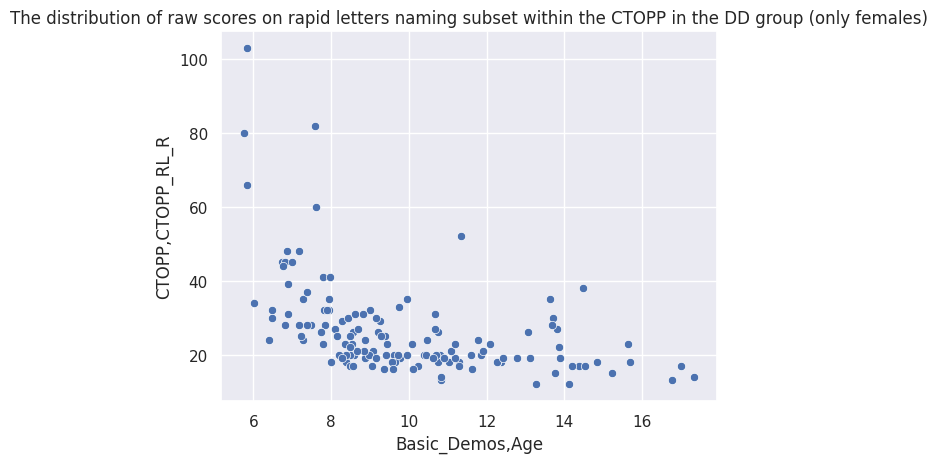

In [72]:
sns.scatterplot(data=subset,
                x='Basic_Demos,Age',
                y='CTOPP,CTOPP_RL_R');
pl.title('The distribution of raw scores on rapid letters naming subset within the CTOPP in the DD group (only females)');

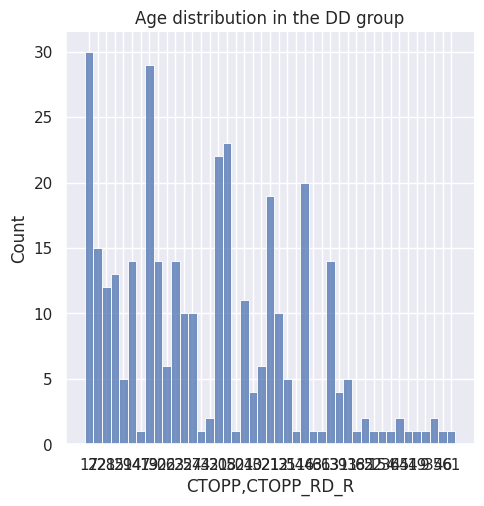

In [ ]:
sns.displot(data_filtered[(data_filtered['DD'] == 1) &(data_filtered['CTOPP,CTOPP_RD_R'] != '.')]['CTOPP,CTOPP_RD_R'],
             binwidth = 1)
pl.title('Age distribution in the DD group');

In [ ]:
data_filtered.groupby(['CTOPP,CTOPP_RD_R'])[['Identifiers']].count()

,Identifiers
"CTOPP,CTOPP_RD_R",
.,68
10,16
11,14
12,20
13,33
14,40
15,27
154,1
16,38


In [ ]:
data_filtered.groupby(['CTOPP,CTOPP_RL_R'])[['Identifiers']].count()

,Identifiers
"CTOPP,CTOPP_RL_R",
.,70
10,6
103,1
11,10
12,13
13,18
14,26
15,31
16,25


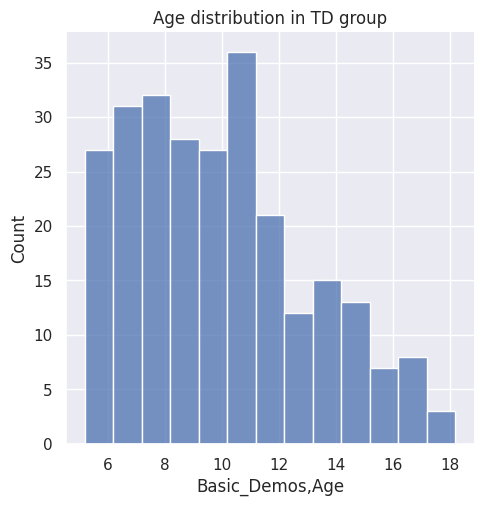

In [ ]:
sns.displot(data_filtered[data_filtered['Status'] == 'control']['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in TD group');

In [ ]:
data_filtered.groupby(['CTOPP'])['Identifiers'].count()

CTOPP
BW_D, BW_P, BW_R, BW_S, EL_D, EL_P, EL_R, EL_S, NR_D, NR_P, NR_R, NR_S, RD_D, RL_D, RO_D, RO_P, RO_R, RO_S, RSN_D      2
BW_D, BW_P, BW_R, BW_S, EL_D, EL_P, EL_R, EL_S, NR_D, NR_P, NR_R, NR_S, RO_D, RO_P, RO_R, RO_S                         3
BW_D, EL_D, NR_D, NR_P, NR_R, NR_S, RD_D, RL_D, RO_D, RO_P, RO_R, RO_S, RSN_D                                          1
BW_D, EL_D, NR_D, RD_D, RL_D, RO_D, RO_P, RO_R, RO_S, RSN_D                                                            4
RD_D, RD_P, RD_R, RD_S, RL_D, RL_P, RL_R, RL_S, RO_D, RO_P, RO_R, RO_S, RSN_Comp, RSN_D, RSN_P, RSN_Sum                2
RD_D, RD_P, RD_R, RD_S, RL_D, RL_P, RL_R, RL_S, RSN_Comp, RSN_D, RSN_P, RSN_Sum                                        2
RD_D, RD_P, RD_R, RD_S, RO_D, RO_P, RO_R, RO_S, RSN_Comp, RSN_D, RSN_P, RSN_Sum                                        1
RL_D, RL_P, RL_R, RL_S, RO_D, RO_P, RO_R, RO_S, RSN_Comp, RSN_D, RSN_P, RSN_Sum                                        1
RL_D, RL_P, RL_R, RL_S, RS

In [ ]:
# subset of people without ctopp score
# bw = blending words, el = elision, nr = non word repetition, rd = rapid digit naming
# rl = rapid letters, ro = rapid objects, rsn = symbol naming??
data_no_ctopp = data_filtered.copy()
data_no_ctopp = data_no_ctopp[data_no_ctopp['CTOPP'] != 'missing']

In [ ]:
print('Dataset w/out CTOPP scores')
print('Controls')
print(data_no_ctopp[data_no_ctopp['Status'] == 'control'].shape[0])
print('DD without comorbidities')
print(data_no_ctopp[data_no_ctopp['Status'] == 'only DD'].shape[0])
print('DD with comorbidities')
print(data_no_ctopp[data_no_ctopp['Status'] == 'DD with comorbidities'].shape[0])

Dataset w/out CTOPP scores
Controls
227
DD without comorbidities
64
DD with comorbidities
271
